# Lab Sheet 2
#### 22889911 Zheyu Zhang

  ### *Data Set Information*
This data set contains training and testing data from a remote sensing study which mapped different forest types based on their spectral characteristics at visible-to-near infrared wavelengths, using ASTER satellite imagery. The output (forest type map) can be used to identify and/or quantify the ecosystem services (e.g. carbon storage, erosion protection) provided by the forest.

  ### *Attribute Information*
Class :

 's' ('Sugi' forest),

 'h' ('Hinoki' forest), 

 'd' ('Mixed deciduous' forest),
 
 'o' ('Other' non-forest land) 

 b1 - b9: ASTER image bands containing spectral information in the green, red, and near infrared wavelengths for three dates
 
 pred_minus_obs_S_b1 - pred_minus_obs_S_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 's' class (b1-b9)
 
 pred_minus_obs_H_b1 - pred_minus_obs_H_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 'h' class (b1-b9)
 
  ### *Relevant Papers*
Johnson, B., Tateishi, R., Xie, Z., 2012. Using geographically-weighted variables for image classification. Remote Sensing Letters, 3 (6), 491-499.

### *Citation Request*

Johnson, B., Tateishi, R., Xie, Z., 2012. Using geographically-weighted variables for image classification. Remote Sensing Letters, 3 (6), 491-499.





## Task 1

### Function for reading in csvfile

In [385]:
import pandas as pd
train = pd.read_csv("training.csv")
test = pd.read_csv("testing.csv")

### Display the few lines of two files

In [386]:
train.head()

class  b1  b2  b3   b4  b5   b6   b7  b8  b9  ...  pred_minus_obs_H_b9  \
0     d  67  51  68  115  69  111  136  31  67  ...                -9.17   
1     s  67  28  51   99  50   97   82  26  59  ...                -2.25   
2     s  63  26  50   95  49   91   81  26  57  ...                -0.44   
3     d  63  42  63   97  66  108  111  28  59  ...                -2.34   
4     s  46  27  50   83  51   90   76  26  56  ...                 1.25   

   pred_minus_obs_S_b1  pred_minus_obs_S_b2  pred_minus_obs_S_b3  \
0               -18.27                -1.80                -6.32   
1               -20.13                -2.11                -6.35   
2               -17.64                -1.81                -4.70   
3               -20.20                -1.89                -5.47   
4               -18.62                -2.17                -7.11   

   pred_minus_obs_S_b4  pred_minus_obs_S_b5  pred_minus_obs_S_b6  \
0               -20.88                -1.63                -6.13   
1               -21.94                -1.22                -6.13   
2               -19.39                -0.65                -5.01   
3               -21.65                -0.99                -5.71   
4               -21.12                -1.56                -6.35   

   pred_minus_obs_S_b7  pred_minus_obs_S_b8  pred_minus_obs_S_b9  
0               -22.56                -5.53                -8.11  
1               -22.20                -3.41                -6.57  
2               -20.89                -3.96                -6.85  
3               -22.19                -3.41                -6.52  
4               -22.19                -4.45                -7.32  

[5 rows x 28 columns]

In [387]:
test.head()

class  b1  b2  b3   b4  b5   b6   b7  b8  b9  ...  pred_minus_obs_H_b9  \
0     d  39  36  57   91  59  101   93  27  60  ...                -2.36   
1     h  84  30  57  112  51   98   92  26  62  ...                -2.26   
2     s  53  25  49   99  51   93   84  26  58  ...                -1.46   
3     s  59  26  49  103  47   92   82  25  56  ...                 2.68   
4     d  57  49  66  103  64  106  114  28  59  ...                -2.94   

   pred_minus_obs_S_b1  pred_minus_obs_S_b2  pred_minus_obs_S_b3  \
0               -18.41                -1.88                -6.43   
1               -16.27                -1.95                -6.25   
2               -15.92                -1.79                -4.64   
3               -13.77                -2.53                -6.34   
4               -21.74                -1.64                -4.62   

   pred_minus_obs_S_b4  pred_minus_obs_S_b5  pred_minus_obs_S_b6  \
0               -21.03                -1.60                -6.18   
1               -18.79                -1.99                -6.18   
2               -17.73                -0.48                -4.69   
3               -22.03                -2.34                -6.60   
4               -23.74                -0.85                -5.50   

   pred_minus_obs_S_b7  pred_minus_obs_S_b8  pred_minus_obs_S_b9  
0               -22.50                -5.20                -7.86  
1               -23.41                -8.87               -10.83  
2               -19.97                -4.10                -7.07  
3               -27.10                -7.99               -10.81  
4               -22.83                -2.74                -5.84  

[5 rows x 28 columns]

### Display the information of the two files

In [388]:
# the information of training set
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                325 non-null    object 
 1   b1                   325 non-null    int64  
 2   b2                   325 non-null    int64  
 3   b3                   325 non-null    int64  
 4   b4                   325 non-null    int64  
 5   b5                   325 non-null    int64  
 6   b6                   325 non-null    int64  
 7   b7                   325 non-null    int64  
 8   b8                   325 non-null    int64  
 9   b9                   325 non-null    int64  
 10  pred_minus_obs_H_b1  325 non-null    float64
 11  pred_minus_obs_H_b2  325 non-null    float64
 12  pred_minus_obs_H_b3  325 non-null    float64
 13  pred_minus_obs_H_b4  325 non-null    float64
 14  pred_minus_obs_H_b5  325 non-null    float64
 15  pred_minus_obs_H_b6  325 non-null    flo

In [389]:
# the information of the testing set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                198 non-null    object 
 1   b1                   198 non-null    int64  
 2   b2                   198 non-null    int64  
 3   b3                   198 non-null    int64  
 4   b4                   198 non-null    int64  
 5   b5                   198 non-null    int64  
 6   b6                   198 non-null    int64  
 7   b7                   198 non-null    int64  
 8   b8                   198 non-null    int64  
 9   b9                   198 non-null    int64  
 10  pred_minus_obs_H_b1  198 non-null    float64
 11  pred_minus_obs_H_b2  198 non-null    float64
 12  pred_minus_obs_H_b3  198 non-null    float64
 13  pred_minus_obs_H_b4  198 non-null    float64
 14  pred_minus_obs_H_b5  198 non-null    float64
 15  pred_minus_obs_H_b6  198 non-null    flo

### Display the number of columns and rows of both parts

In [390]:
print("train:",train.shape)
print("test:",test.shape)

train: (325, 28)
test: (198, 28)


Read in the two csv files, and displayed the first few lines, the information and the distribution of class for both train part and test part. There are total 28 columns, including 'class', spectral information (b1-b9) and the difference between predicted spectral values and actual spectral values for the relative class.
There are 325 rows in training set and 198 rows in testing set.

### Check NAs

In [391]:
train.isnull().sum()

class                  0
b1                     0
b2                     0
b3                     0
b4                     0
b5                     0
b6                     0
b7                     0
b8                     0
b9                     0
pred_minus_obs_H_b1    0
pred_minus_obs_H_b2    0
pred_minus_obs_H_b3    0
pred_minus_obs_H_b4    0
pred_minus_obs_H_b5    0
pred_minus_obs_H_b6    0
pred_minus_obs_H_b7    0
pred_minus_obs_H_b8    0
pred_minus_obs_H_b9    0
pred_minus_obs_S_b1    0
pred_minus_obs_S_b2    0
pred_minus_obs_S_b3    0
pred_minus_obs_S_b4    0
pred_minus_obs_S_b5    0
pred_minus_obs_S_b6    0
pred_minus_obs_S_b7    0
pred_minus_obs_S_b8    0
pred_minus_obs_S_b9    0
dtype: int64

In [392]:
test.isnull().sum()

class                  0
b1                     0
b2                     0
b3                     0
b4                     0
b5                     0
b6                     0
b7                     0
b8                     0
b9                     0
pred_minus_obs_H_b1    0
pred_minus_obs_H_b2    0
pred_minus_obs_H_b3    0
pred_minus_obs_H_b4    0
pred_minus_obs_H_b5    0
pred_minus_obs_H_b6    0
pred_minus_obs_H_b7    0
pred_minus_obs_H_b8    0
pred_minus_obs_H_b9    0
pred_minus_obs_S_b1    0
pred_minus_obs_S_b2    0
pred_minus_obs_S_b3    0
pred_minus_obs_S_b4    0
pred_minus_obs_S_b5    0
pred_minus_obs_S_b6    0
pred_minus_obs_S_b7    0
pred_minus_obs_S_b8    0
pred_minus_obs_S_b9    0
dtype: int64

Check if there is any NAs in both training set and testing set.
The results tell that there is no NA in the sets.

### Visualising

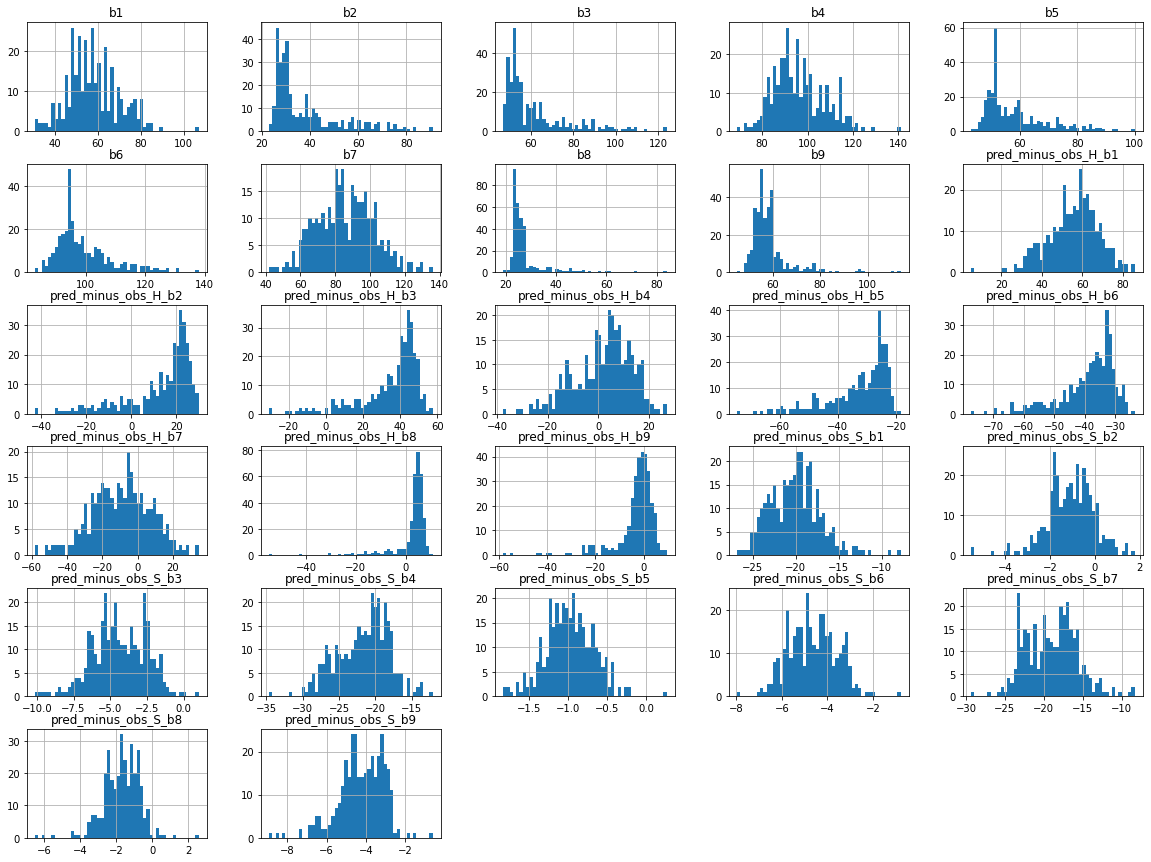

In [393]:
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

The attributes have different scales which means it requires scaling in the next step.

The attributes b1-b9 have values larger than zero and it seems most are showing right skewed.

For the attributes begins with 'pred_minus_obs_H', most are showing left skew.
As to the attributes begins with 'pred_minus_obs_S', most shows an approximation of a normal distribution, with a similar number of heads and tails, however most of the values are lower than zero.

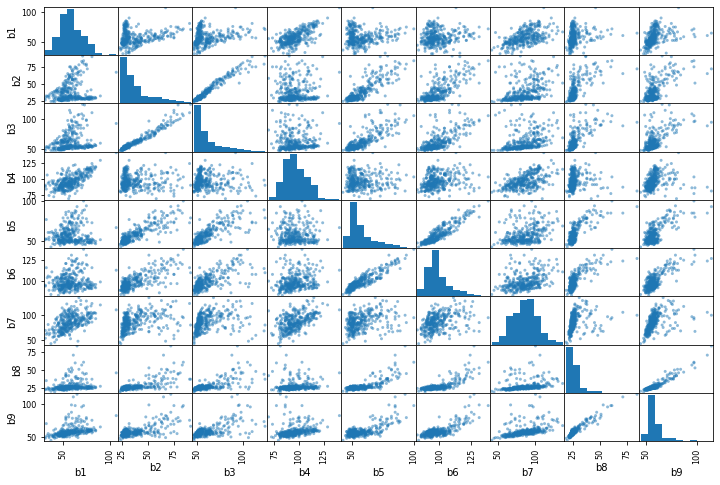

In [394]:
from pandas.plotting import scatter_matrix

attributes = ["b1", "b2", "b3", "b4" ,"b5", "b6", "b7", "b8", "b9"]
scatter_matrix(train[attributes], figsize=(12, 8))
plt.show()


It is clear that almost all the image bands have the explicitly positive relations, except, b8 and b9, they have the positive relations with others, however, it is not as clear as that of b1 to b7.

<AxesSubplot:xlabel='b2', ylabel='b3'>

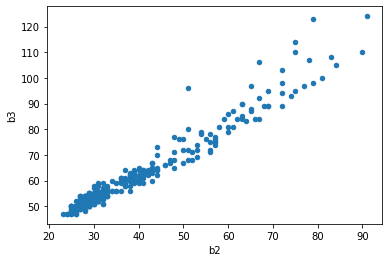

In [395]:
train.plot(kind = "scatter", x="b2", y="b3")

<AxesSubplot:xlabel='b5', ylabel='b6'>

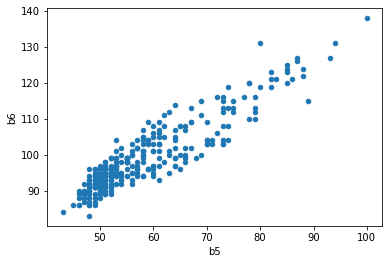

In [396]:
train.plot(kind = "scatter", x="b5", y="b6")

<AxesSubplot:xlabel='b8', ylabel='b9'>

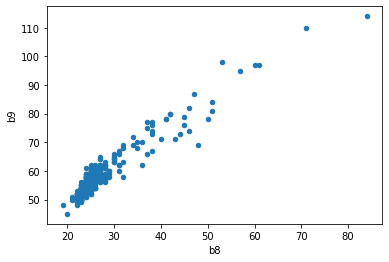

In [397]:
train.plot(kind = "scatter", x="b8", y="b9")

According to the three scatter plots above, b2&b3, b5&b6 and b8&b9 have a stronger correlation, besides they all have a clear upward trend and concentrated point.

## Task 2

### Remove all the columns begin with `pred_minus_obs`

In [398]:
def Rmcolumn(dataset):
    remove_name = list(dataset.filter(regex='pred_minus_obs'))
    # get names of column that need to be removed
    col_left = dataset.columns.drop(remove_name)
    return dataset[col_left]
train_rm = Rmcolumn(train)
test_rm = Rmcolumn(test)

## Task 3

### Count the number of instances for each class label

### Display the distribution of class in training set

In [399]:
train['class'].value_counts()

s    136
d    105
o     46
h     38
Name: class, dtype: int64

In [400]:
train['class'].value_counts()/len(train)
#propotion of each class

s    0.418462
d    0.323077
o    0.141538
h    0.116923
Name: class, dtype: float64

<AxesSubplot:>

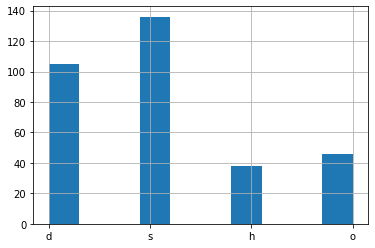

In [401]:
train['class'].hist()

The bar chart and the `.value_counts()` tell that the training set is imbalanced.

### Display the distribution of class in testing set

In [402]:
test['class'].value_counts()

s    59
d    54
h    48
o    37
Name: class, dtype: int64

In [403]:
test['class'].value_counts()/len(test)

s    0.297980
d    0.272727
h    0.242424
o    0.186869
Name: class, dtype: float64

## Task 4

## Text processing

In [404]:
train_cat = train_rm[['class']]
train_num = train_rm.drop('class', axis=1)
test_cat = test_rm[['class']]
test_num = test_rm.drop('class', axis=1)

from sklearn.preprocessing import OrdinalEncoder
import numpy as np
ordinal_encoder = OrdinalEncoder()
train_cat_encoded = ordinal_encoder.fit_transform(train_cat)
test_cat_encoded = ordinal_encoder.fit_transform(test_cat)
train_cat_encoded0 = np.hstack(train_cat_encoded)
test_cat_encoded0 = np.hstack(test_cat_encoded)


Transform the attribute 'class' in both training and testing set into numbers.

## Feature Scaline

In [405]:
from sklearn.preprocessing import StandardScaler

stdsca = StandardScaler()
train_prepared = stdsca.fit_transform(train_num)
test_prepared = stdsca.fit_transform(test_num)

# Task 5

In [406]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

param_grid_ovrsvc = [
    # 16 (4×4) combinations of hyperparameters
    {"estimator__C":[10,100,1000,10000], "estimator__gamma": [0.001,0.01,0.1,1]}
    ]
ovosvc = OneVsOneClassifier(SVC(kernel='rbf'))



# across 3 folds
grid_search_ovosvc = GridSearchCV(ovosvc, param_grid_ovrsvc, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
                           
grid_search_ovosvc.fit(train_prepared, train_cat_encoded0)
ovosvc_pred = grid_search_ovosvc.predict(test_prepared)
ovosvc_correct = sum(ovosvc_pred == test_cat_encoded0)
print(ovosvc_correct/len(ovosvc_pred))

0.8787878787878788


In [407]:
grid_search_ovosvc.best_params_

{'estimator__C': 1000, 'estimator__gamma': 0.001}

Use the Support Vector Machine Classifier to perform multiclass classification using the one-verse-one strategy, in this case, there are two hyperparameter which are C and gamma. 

We tried 16 (4 * 4) combinations of hyperparameters, both C and gamma have 4 values, and we train across 3-folds, thereby, totally 48 (16 * 3) rounds of training.

After using grid search and 3-fold cross validation, we obtained the best parameters through finding the minmun mean squared error, C equals to 1000 and gamma equals to 0.001, the final accuracy is 0.879 (87.9%).


# Task 6
## Stochastic Gradient Descent Classifier

In [408]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
param_grid_sgd = [
    # try 15 (3×5) combinations of hyperparameters
    {'max_iter': [100, 1000, 10000,100000], 'tol': [0.01, 0.1, 1, 10, 100]}
    ]
sgd = SGDClassifier(random_state=42)

# across 3 folds
grid_search_sgd = GridSearchCV(sgd, param_grid_sgd, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
                           
grid_search_sgd.fit(train_prepared, train_cat_encoded0)
sgd_pred = grid_search_sgd.predict(test_prepared)
sgd_correct = sum(sgd_pred == test_cat_encoded0)
print(sgd_correct/len(sgd_pred))

0.8535353535353535


In [409]:
grid_search_sgd.best_params_

{'max_iter': 100, 'tol': 0.01}

Use the Stochastic Gradient Descent Classifier to perform multiclass classification using the one-verse-rest strategy by default, in this time, there are two hyperparameter which are max_iter and tol. 

We have tried 20 (4 * 5) combinations of hyperparameters, both C and gamma have 4 values, and we train across 3-folds, thereby, totally 60 (20 * 3) rounds of training.

After using grid search and 3-fold cross validation, we obtained the best parameters through finding the minmun mean squared error, max_iter equals to 100 and tol equals to 0.01, the final accuracy is 0.854 (85.4%).


# Task 7

### Use 3-fold Cross Validation on testing set

In [410]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

ovosvc_score = cross_val_score(ovosvc, test_prepared, test_cat_encoded0, cv = 3, scoring = "accuracy")
sgd_score = cross_val_score(sgd, test_prepared, test_cat_encoded0, cv = 3, scoring = "accuracy")
print("Score of SVC using One vs One:", ovosvc_score)
print("Score of SGD:", sgd_score)

Score of SVC using One vs One: [0.90909091 0.93939394 0.96969697]
Score of SGD: [0.87878788 0.89393939 0.95454545]


### Confusion-Matrix

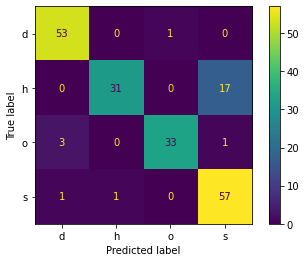

In [411]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


mat = confusion_matrix(test_cat_encoded, ovosvc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=['d', 'h', 'o', 's'])
disp.plot()



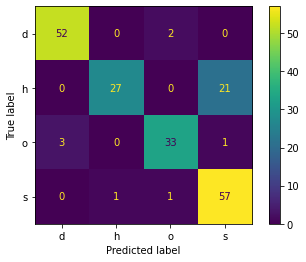

In [412]:
ConfusionMatrixDisplay.from_estimator(grid_search_sgd.best_estimator_, test_prepared, test_cat_encoded0, display_labels=['d', 'h', 'o', 's'])
plt.show()

In [413]:
print("Accuracy of SVC using One vs One:", accuracy_score(test_cat_encoded0, ovosvc_pred))
print("Accuracy of SGD:", accuracy_score(test_cat_encoded0, sgd_pred))

Accuracy of SVC using One vs One: 0.8787878787878788
Accuracy of SGD: 0.8535353535353535


Using the 3-fold cross validation for testing set of the two classifiers, the performances are both in a high level, especially for the SVC in one vs one strategy, the scoring are all above 90%, illustrating that the SVC is a little better than SGD.


The accuracies for two classifiers are close, seperately 87.9%(SVC in OneVsOneClassifier) and 85.4% (SGDClassifier), SVC is also higher than SGD。


The matrix results for both two classifiers looks similar and the results looks good, since most forest type are on the main diagonal, which means that they were classified correctly.


However, it is also clear that class 'h' ('Hinoki' forest) is easily misrecognized as class 's' ('Sugi' forest), because in the two matrix of two classifiers, this postion also tends to have a larger number.


Lastly, if looks more closely，there is also a very small probability that class 'o' ('Other' non-forest land) and class 'd' ('Mixed deciduous' forest) would get confused.

Totally, SVC in one vs one strategy is better than SGD Classifier in this case.